# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [42]:
import time

sess = tf.Session()
sizes  = range(100, 3000, 100)
time_spent_array_tf = []
for n in sizes:
    x = tf.random.uniform([n, n])
    y = tf.reduce_sum(tf.diag_part(x) ** 2)
    ...
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    time_spent_array_tf.append(time_spent)

# The same but for numpy
time_spent_array_np = []
for n in sizes:
    x = np.random.uniform(size=(n, n))
    begin = time.time()
    y = x.diagonal()@x.diagonal()
    end = time.time()
    time_spent = end - begin
    time_spent_array_np.append(time_spent)


# plot results
def plot_results(time_np, time_tf, y_axis, title):
    plt.figure(figsize=(10, 3))
    plt.plot(y_axis, time_tf, label="Время работы Tensor")
    plt.plot(y_axis, time_np, label="Время работы Numpy")
    plt.yscale("log")
    plt.legend()
    plt.title(title)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Логарифм от потраченного времени')
    plt.show()
sess.close()

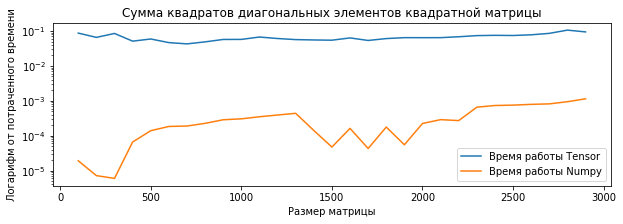

In [43]:
plot_results(time_spent_array_np,time_spent_array_tf,sizes, 'Сумма квадратов диагональных элементов квадратной матрицы')

In [44]:
sess = tf.Session()
time_spent_array_tf = []
for n in sizes:
    x = tf.random.uniform([n])
    y = tf.random.uniform([n])
    res = tf.acos(tf.tensordot(x, y, axes=1) / (tf.linalg.norm(x) * tf.linalg.norm(y)))
    begin = time.time()
    sess.run(res)
    end = time.time()
    time_spent = end - begin
    time_spent_array_tf.append(time_spent)
sess.close()

In [45]:
time_spent_array_np = []
for n in sizes:
    x = np.random.uniform(size=(n))
    y = np.random.uniform(size=(n))
    begin = time.time()
    res = np.arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))
    end = time.time()
    time_spent = end - begin
    time_spent_array_np.append(time_spent)    

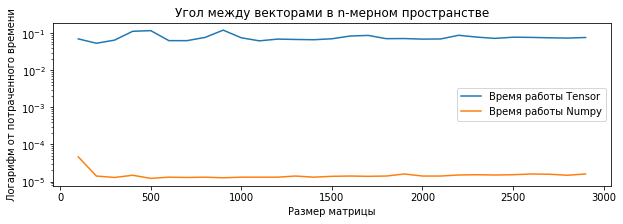

In [46]:
plot_results(time_spent_array_np,time_spent_array_tf,sizes, 'Угол между векторами в n-мерном пространстве')

In [47]:
sess = tf.Session()
time_spent_array_tf = []
for n in sizes:
    x = tf.random.uniform(shape= (n, n))
    y = tf.random.uniform(shape= (n, n))
    
    res = tf.matmul(x, y) - tf.matmul(y, x)
    
    begin = time.time()
    sess.run(res)
    end = time.time()
    time_spent = end - begin
    time_spent_array_tf.append(time_spent)
sess.close()

In [48]:
time_spent_array_np = []
for n in sizes:
    x = np.random.uniform(size=(n, n))
    y = np.random.uniform(size=(n, n))
    begin = time.time()
    x@y - y@x
    end = time.time()
    time_spent = end - begin
    time_spent_array_np.append(time_spent)

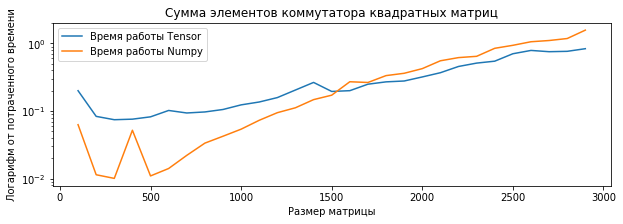

In [49]:
plot_results(time_spent_array_np,time_spent_array_tf,sizes, 'Сумма элементов коммутатора квадратных матриц')

В первых 2 графиках numpy является безоговорочным лидером, однако для третей оперции видим четкую смену - при росте размера матрицы тензор становится более эффективным. Возможно, он оптимизирован под бОльшие размеры матриц и более сложные операции, нежели numpy

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [77]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [87]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [88]:
def train(train_op, X=X, y=y, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

In [136]:
loss_arr = []
loss_mean = []
loss_std = []
momentums  = [j/10 for j in range(1, 10)] 
for m in momentums:
    train_op = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=m).minimize(loss)
    loss_history = train(train_op)
    loss_arr.append(loss_history)
    loss_mean.append(np.mean(loss_history))
    loss_std.append(np.std(loss_history))


Momentum =  0.1  mean =  0.15082124  std =  0.06904288
Momentum =  0.2  mean =  0.14321075  std =  0.06959976
Momentum =  0.3  mean =  0.13515945  std =  0.069920935
Momentum =  0.4  mean =  0.12667055  std =  0.0699872
Momentum =  0.5  mean =  0.1177576  std =  0.069816075
Momentum =  0.6  mean =  0.10842802  std =  0.069512546
Momentum =  0.7  mean =  0.098912224  std =  0.06943423
Momentum =  0.8  mean =  0.09203495  std =  0.07125087
Momentum =  0.9  mean =  0.10320403  std =  0.088097006


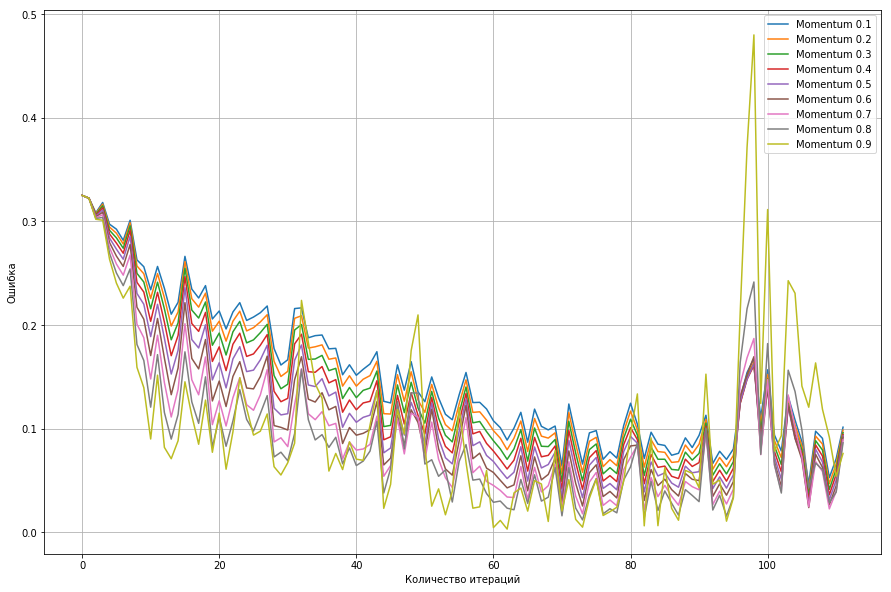

In [137]:
plt.figure(figsize=(15, 10))
for i in range(len(loss_arr)):
    plt.plot(loss_arr[i], label = "Momentum {}".format(momentums[i]))
    print('Momentum = ',momentums[i], ' mean = ', loss_mean[i], ' std = ', loss_std[i] )
plt.grid(True)
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

Ваш ответ: оптимальным является Momentum =  0.8 (с mean =  0.09203495  std =  0.07125087)

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

In [155]:
loss_arr = []
loss_mean = []
loss_std = []
lr_array = [0.1, 0.01, 0.001, 0.0001]
for i in lr_array:
    train_op = tf.train.MomentumOptimizer(learning_rate=i, momentum=0.8).minimize(loss)
    loss_history = train(train_op)
    loss_arr.append(loss_history)
    loss_mean.append(np.mean(loss_history))
    loss_std.append(np.std(loss_history))


Learning rate =  0.1  mean =  1.1952583  std =  0.47406307
Learning rate =  0.01  mean =  0.09203495  std =  0.07125087
Learning rate =  0.001  mean =  0.21392311  std =  0.058976192
Learning rate =  0.0001  mean =  0.30996946  std =  0.0094188545


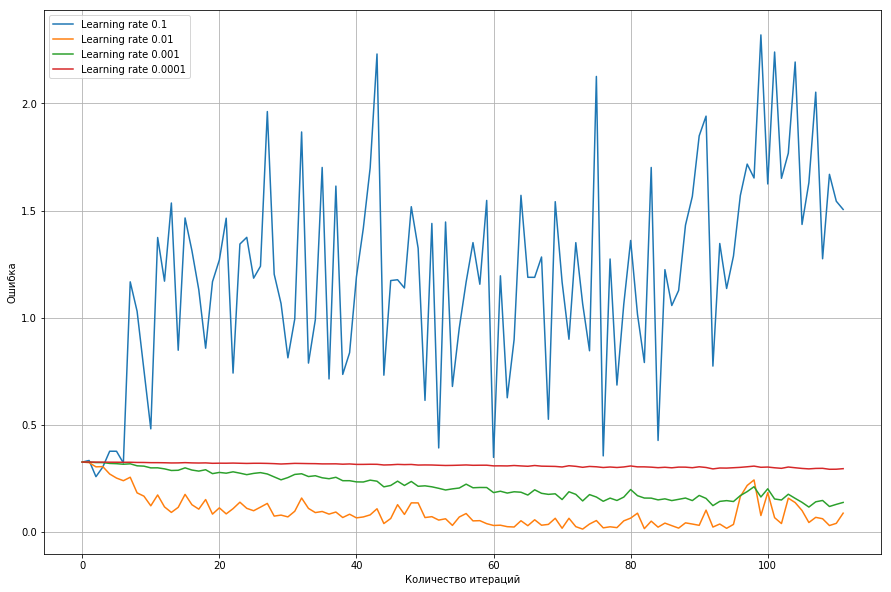

In [156]:
plt.figure(figsize=(15, 10))
for i in range(len(loss_arr)):
    plt.plot(loss_arr[i], label = "Learning rate {}".format(lr_array[i]))
    print('Learning rate = ',lr_array[i], ' mean = ', loss_mean[i], ' std = ', loss_std[i] )
plt.grid(True)
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

Ваш ответ: чем больше шаг спуска, тем больше шум (разброс), при меньшем шаге нужно большее число шагов для достижения минимума (на совсем маленьком шаге размер ошибки практически не меняется)


**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

Learning rate =  0.1  mean =  2.1108131  std =  0.43430254
Learning rate =  0.01  mean =  0.08779222  std =  0.08609413
Learning rate =  0.001  mean =  0.13739611  std =  0.06983916
Learning rate =  0.0001  mean =  0.28627852  std =  0.022094503


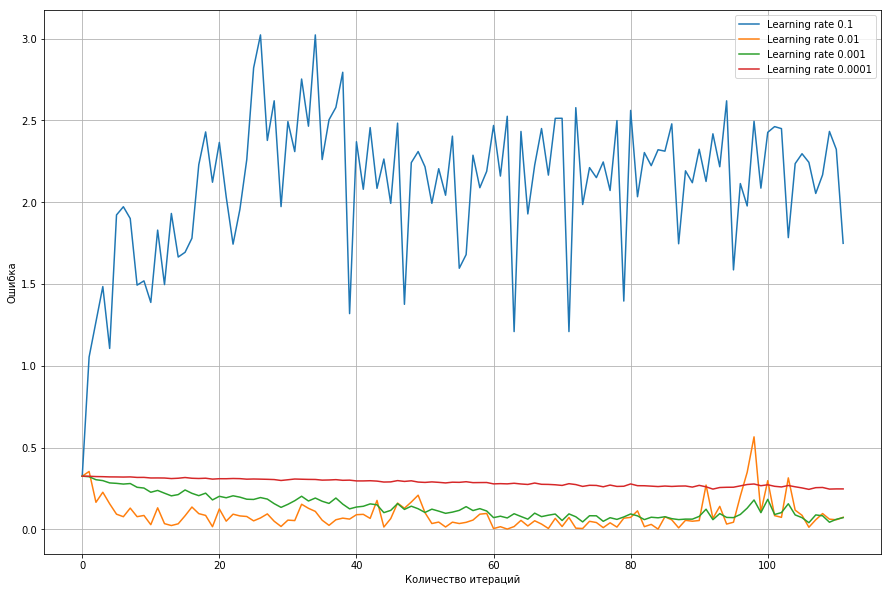

In [157]:
loss_arr = []
loss_mean = []
loss_std = []
lr_array = [0.1, 0.01, 0.001, 0.0001]
for i in lr_array:
    train_op = tf.train.AdamOptimizer(learning_rate=i).minimize(loss)
    loss_history = train(train_op)
    loss_arr.append(loss_history)
    loss_mean.append(np.mean(loss_history))
    loss_std.append(np.std(loss_history))
plt.figure(figsize=(15, 10))
for i in range(len(loss_arr)):
    plt.plot(loss_arr[i], label = "Learning rate {}".format(lr_array[i]))
    print('Learning rate = ',lr_array[i], ' mean = ', loss_mean[i], ' std = ', loss_std[i] )
plt.grid(True)
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

Ваш ответ: кажется, сходится быстрее

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

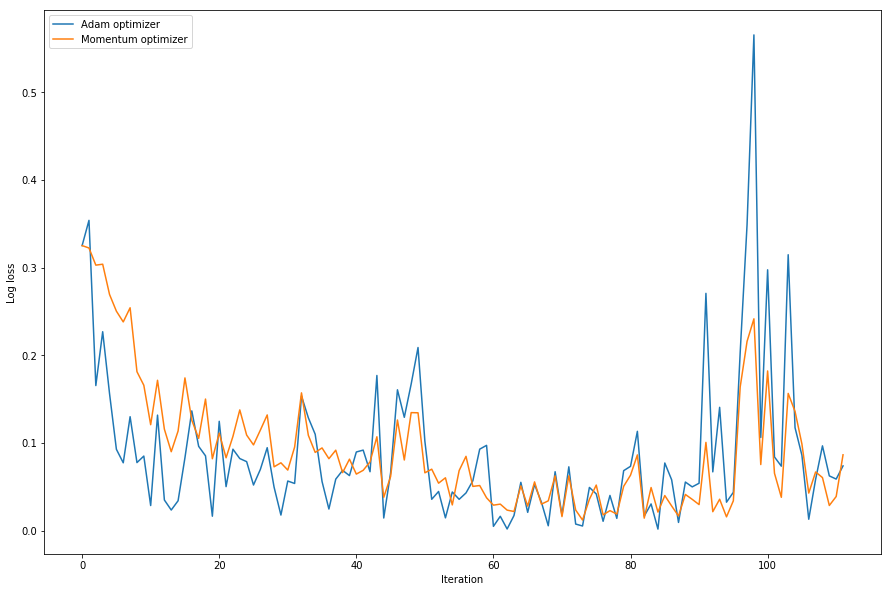

In [160]:
plt.figure(figsize=(15, 10))

adam_tr = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
adam_loss = train(adam_tr)

momentum_tr = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.8).minimize(loss)
momentum_loss = train(momentum_tr)

plt.plot(adam_loss, label="Adam optimizer")
plt.plot(momentum_loss, label="Momentum optimizer")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.show()

Ваш ответ: адам более шумный, но моментум работает медленнее. какой лучше - наверное, зависит от задачи. если подсчеты сложные, то я бы брала адам. если с этим проблем нет, то более "не шумный" моментум

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [161]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

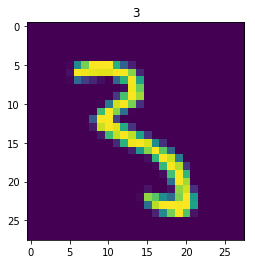

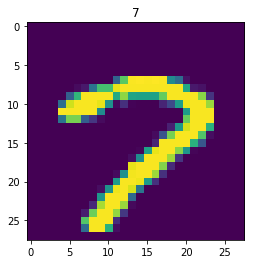

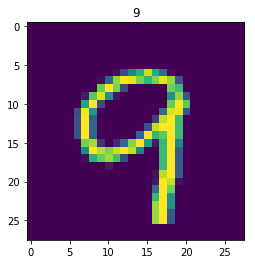

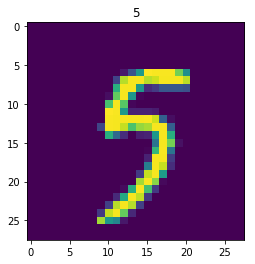

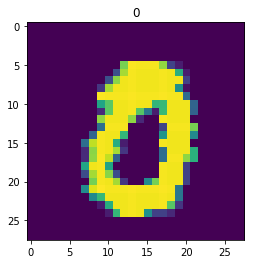

In [162]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [193]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()
tf.random.set_random_seed(755)
def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=8):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(4):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

##если вы узнаёте код, так и задумано, брала кусочки из второго семинара

l1 = tf.layers.dense(X_input, 392, activation=tf.nn.relu,  kernel_initializer=
                         tf.keras.initializers.he_normal())
l2 = tf.layers.dense(l1, 196, activation=tf.nn.relu)
l3 = tf.layers.dense(l2, 100, activation=tf.nn.relu)
l4 = tf.layers.dense(l3, 10)

predicted = tf.nn.softmax(l4)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=l4, labels=tf.one_hot(y_input, depth=10)) 

train_op = tf.train.AdamOptimizer().minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9766


![title](ml.png)